# Historical Voting Patterns
- In this notebook I am going to be using Data Science techniques to determine if a county in Colorado is considered a Republican, Democrat or a swing county. I have data from top of the ticket elections from 2012, 2014, 2016.
- I pulled the data from the Colorado Election Results Archives on the Colorado Secretary of State's website.
    - https://www.sos.state.co.us/pubs/elections/Results/Archives.html

In [105]:
import pandas as pd
import glob, os
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
pd.set_option("display.max_rows", 70)

Each CSV looks like this when loaded into a DataFrame

In [107]:
house_2012 = pd.read_csv("./data/house_2012.csv")

In [108]:
house_2012.head()

County              DEM_2012_house              REP_2012_house  \
0    CountyArapahoe   Diana DeGette (DEM)13,705     Danny Stroud (REP)9,087   
1      CountyDenver  Diana DeGette (DEM)207,165    Danny Stroud (REP)63,082   
2   CountyJefferson   Diana DeGette (DEM)16,709    Danny Stroud (REP)21,048   
3     CountyBoulder     Jared Polis (DEM)93,758  Kevin Lundberg (REP)27,623   
4  CountyBroomfield     Jared Polis (DEM)16,208  Kevin Lundberg (REP)13,829   

    total_votes  
0   Total24,256  
1  Total284,205  
2   Total39,767  
3  Total128,237  
4   Total31,667

Taking each CSV and transforming them into the format I want and merging them together.

In [109]:
def county_history(folder):
    counties = ['Adams', 'Alamosa', 'Arapahoe', 'Archuleta', 'Baca', 'Bent', 'Boulder',
       'Broomfield', 'Chaffee', 'Cheyenne', 'Clear Creek', 'Conejos',
       'Costilla', 'Crowley', 'Custer', 'Delta', 'Denver', 'Dolores',
       'Douglas', 'Eagle', 'El Paso', 'Elbert', 'Fremont', 'Garfield',
       'Gilpin', 'Grand', 'Gunnison', 'Hinsdale', 'Huerfano', 'Jackson',
       'Jefferson', 'Kiowa', 'Kit Carson', 'La Plata', 'Lake', 'Larimer',
       'Las Animas', 'Lincoln', 'Logan', 'Mesa', 'Mineral', 'Moffat',
       'Montezuma', 'Montrose', 'Morgan', 'Otero', 'Ouray', 'Park', 'Phillips',
       'Pitkin', 'Prowers', 'Pueblo', 'Rio Blanco', 'Rio Grande', 'Routt',
       'Saguache', 'San Juan', 'San Miguel', 'Sedgwick', 'Summit', 'Teller',
       'Washington', 'Weld', 'Yuma']
    vote_history = pd.DataFrame(data = counties, columns=["county"])
    file_list = [file for file in glob.glob(folder+"*.csv")]
    file_list.sort()
    for file in file_list:
        race = file[7:-4]
        df = pd.read_csv(file)
        df.columns = ["county", "dem_"+race, "rep_"+race, "total_votes"]
        df["county"] = df["county"].apply(lambda x : x.replace("County", ""))
        df["dem_"+race] = df["dem_"+race].apply(lambda x: x.split(")")[-1].replace(",","")).astype(int)
        df["rep_"+race] = df["rep_"+race].apply(lambda x: x.split(")")[-1].replace(",","")).astype(int)
        df["total_votes"] = df["total_votes"].apply(lambda x : x.replace("Total", "").replace(",","")).astype(int)
        df = df.groupby("county", sort=False).sum().reset_index()
#        print(df.head(8))
        df["dem_"+race+"_%"] = df["dem_"+race] / df["total_votes"]
        df["rep_"+race+"_%"] = df["rep_"+race] / df["total_votes"]
        df.drop(["dem_"+race, "rep_"+race, "total_votes"], axis=1, inplace=True)
        vote_history = pd.merge(vote_history, df, how="left", on="county")
    
    return vote_history
        
        
        

In [110]:
county_vote_history = county_history("./data/")

This is the outcome of the function above

In [111]:
county_vote_history.head(10)

county  dem_gov_2014_%  rep_gov_2014_%  dem_house_2012_%  \
0       Adams        0.501126        0.444168          0.526886   
1     Alamosa        0.509386        0.433133          0.486207   
2    Arapahoe        0.520078        0.439368          0.485311   
3   Archuleta        0.394250        0.555210          0.339208   
4        Baca        0.217578        0.725616          0.247859   
5        Bent        0.346835        0.593038          0.376142   
6     Boulder        0.681187        0.260073          0.689809   
7  Broomfield        0.510685        0.443318          0.511826   
8     Chaffee        0.471398        0.482033          0.000000   
9    Cheyenne        0.159113        0.784957          0.130798   

   rep_house_2012_%  dem_house_2014_%  rep_house_2014_%  dem_house_2016_%  \
0          0.401861          0.511630          0.470264          0.514574   
1          0.458622          0.425093          0.515413          0.495194   
2          0.450000          0.455291          0.490463          0.457761   
3          0.595602          0.297932          0.634433          0.356941   
4          0.698237          0.178631          0.754591          0.142857   
5          0.572273          0.311182          0.622364          0.332273   
6          0.257771          0.685239          0.296476          0.694179   
7          0.436701          0.504131          0.495869          0.528920   
8          0.586237          0.461394          0.538606          0.413243   
9          0.828386          0.099704          0.839092          0.117920   

   rep_house_2016_%  dem_pres_2012_%  rep_pres_2012_%  dem_pres_2016_%  \
0          0.426280         0.571123         0.402724         0.498552   
1          0.462774         0.567535         0.402829         0.459576   
2          0.478489         0.539042         0.439863         0.527590   
3          0.597823         0.397832         0.574993         0.340646   
4          0.815436         0.221747         0.740266         0.131444   
5          0.641759         0.419670         0.553553         0.306175   
6          0.258321         0.696890         0.278447         0.703362   
7          0.410480         0.517619         0.457882         0.523508   
8          0.530998         0.486140         0.484611         0.434489   
9          0.848654         0.157365         0.813358         0.119782   

   rep_pres_2016_%  dem_senate_2014_%  rep_senate_2014_%  dem_senate_2016_%  \
0         0.413482           0.476951           0.448761           0.526509   
1         0.438968           0.474155           0.456665           0.529977   
2         0.386252           0.480201           0.464848           0.540040   
3         0.581006           0.372272           0.569045           0.379206   
4         0.814213           0.189887           0.739107           0.269878   
5         0.616502           0.321406           0.606390           0.422315   
6         0.220022           0.685858           0.273544           0.679873   
7         0.381189           0.482018           0.464779           0.530655   
8         0.479200           0.452146           0.493485           0.467010   
9         0.839383           0.117534           0.816956           0.201835   

   rep_senate_2016_%  
0           0.412360  
1           0.415089  
2           0.409837  
3           0.561500  
4           0.687091  
5           0.539103  
6           0.246233  
7           0.411749  
8           0.478110  
9           0.759633

In [112]:
county_vote_history.shape

(64, 17)

# Grouping counties into 3 clusters using KMeans
- This is to group all counties into three categories:
    - Democrat
    - Republican
    - Swing
- I will be using KMeans so I can set the number to cluster the model is creating to 3.

In [113]:
X = county_vote_history.drop("county", axis=1)
y = county_vote_history["county"]

In [114]:
model = KMeans(n_clusters=3, random_state=33).fit(X)

In [115]:
X["labels"] = model.labels_

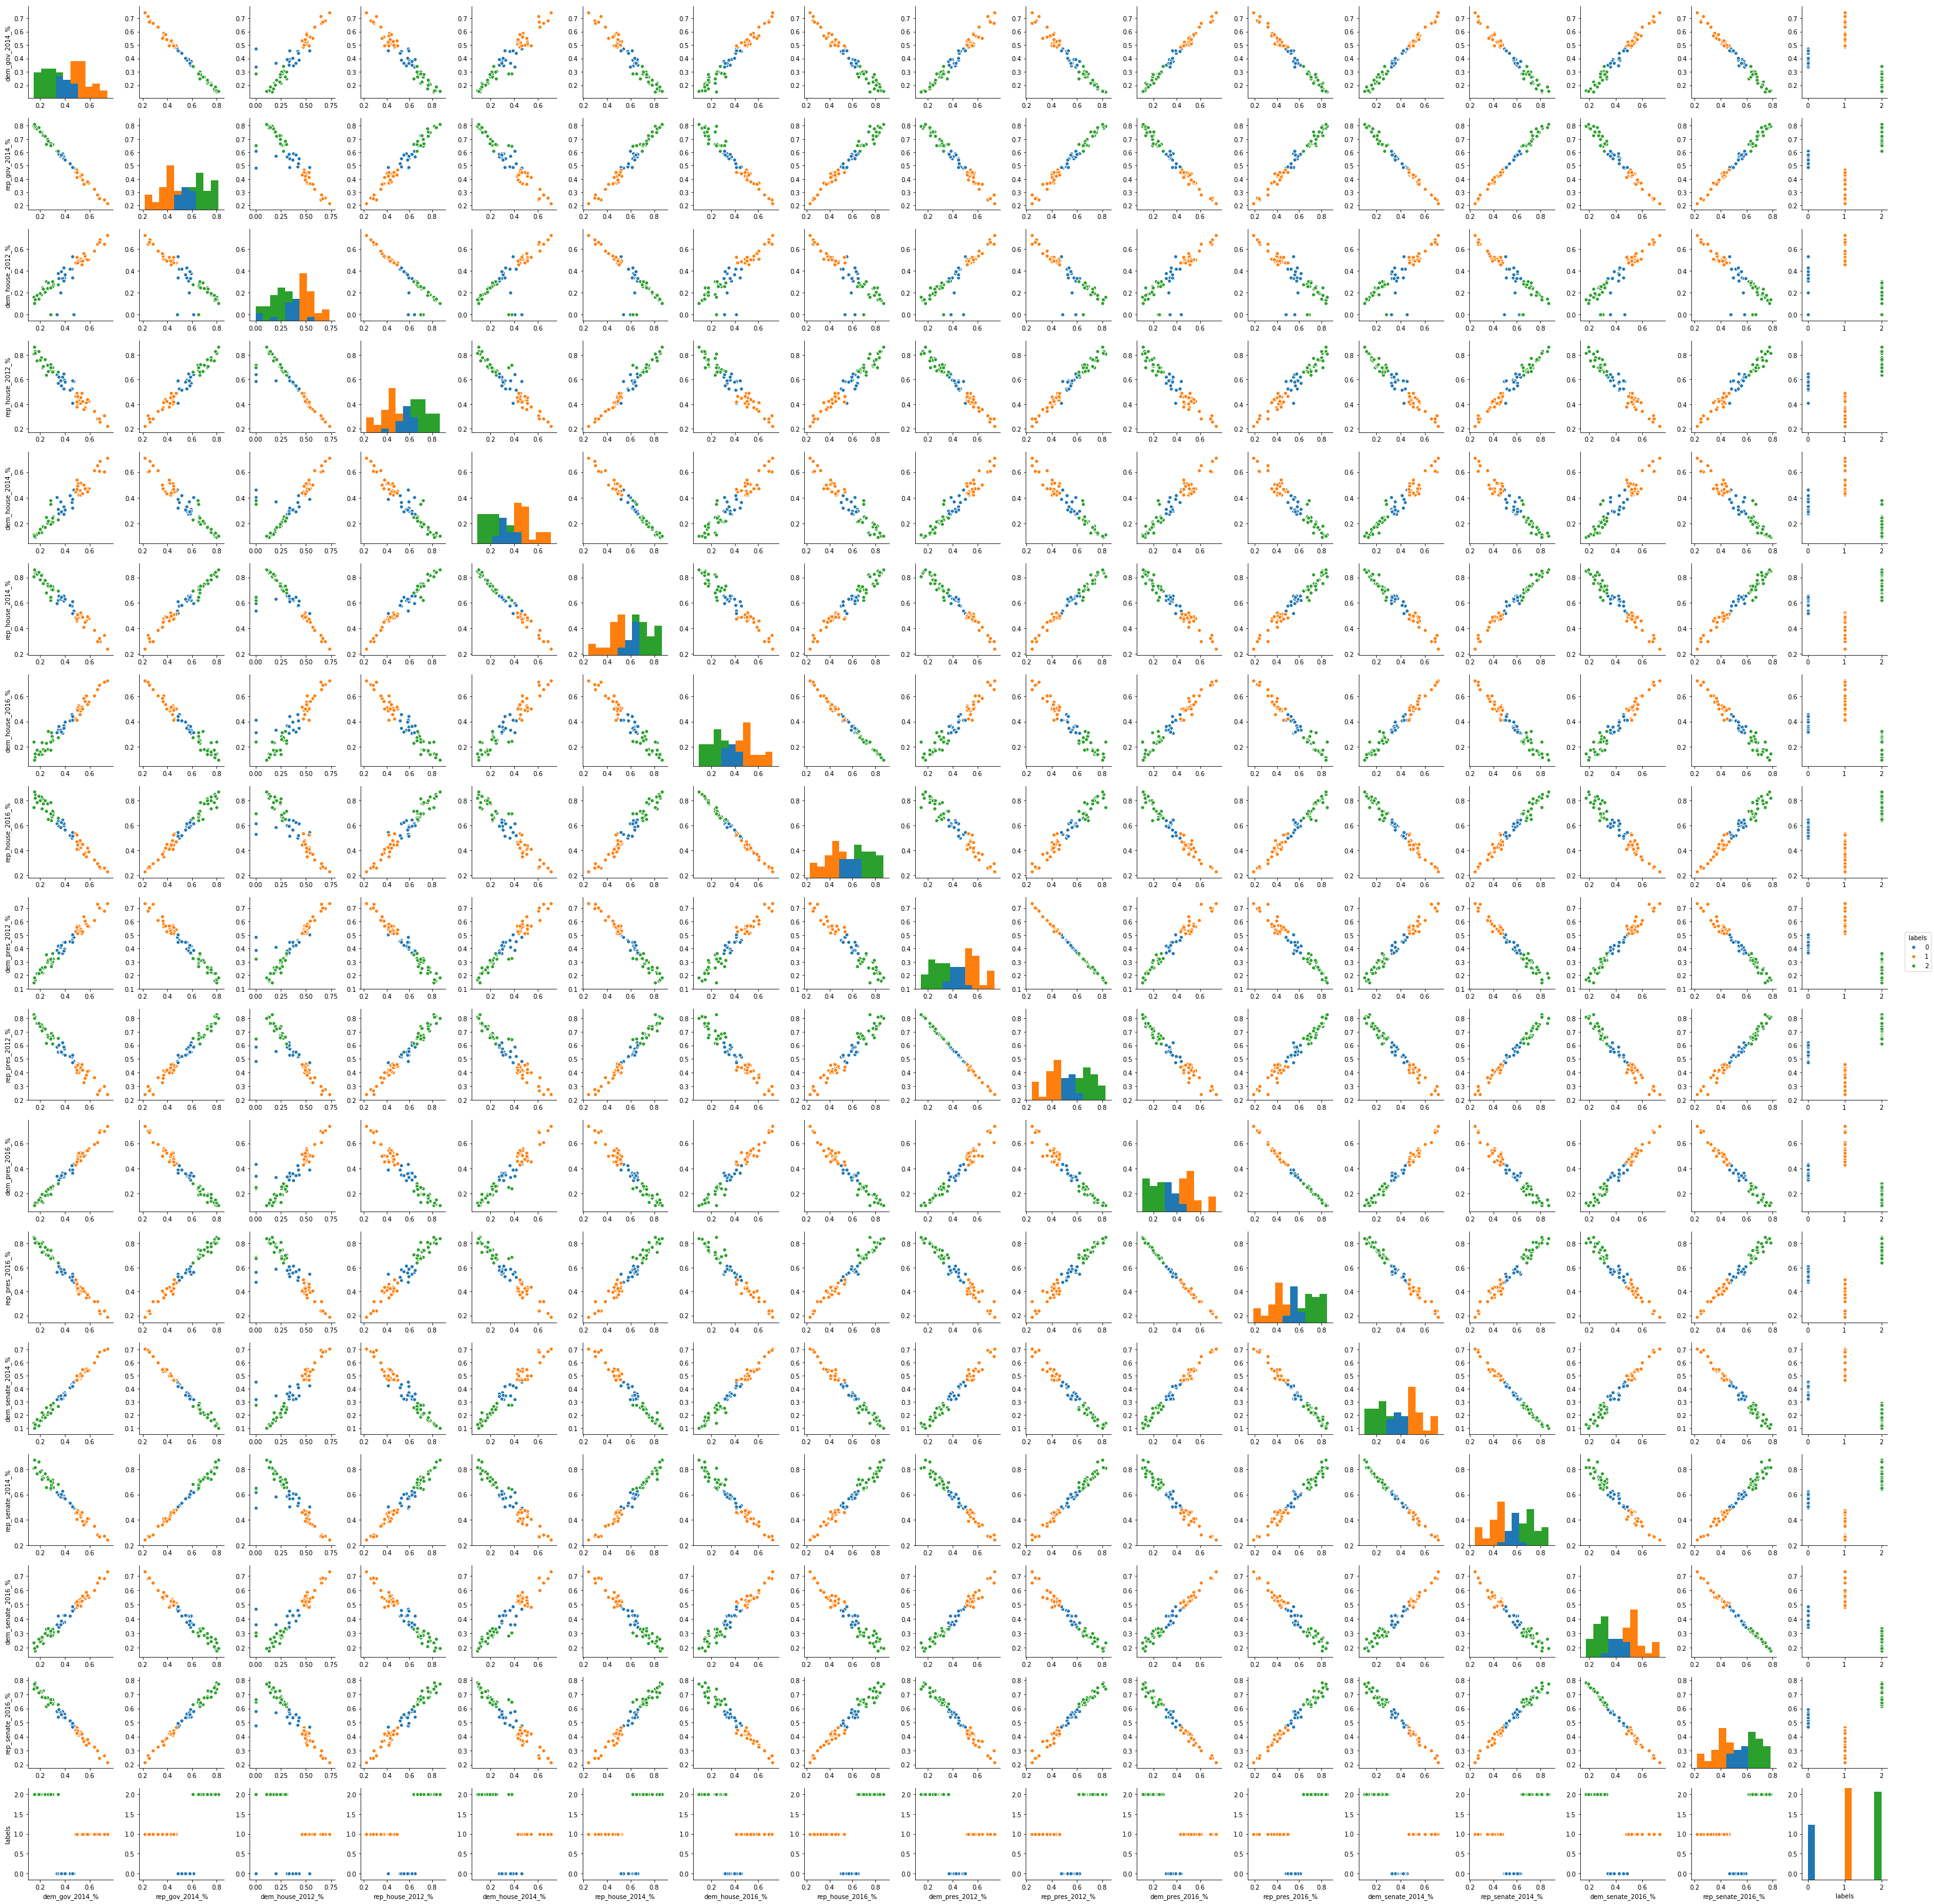

In [116]:
sns.pairplot(X, hue="labels")

In [117]:
county_history_df = pd.concat([county_vote_history,pd.DataFrame(data = model.labels_, columns=["label_3"])], axis=1)

Looking at the graphs above I can determine what 0, 1, and 2 represent. 

In [118]:
county_history_df["label_3"] = county_history_df["label_3"].map({2:"REP", 1:"DEM", 0:"Swing"})

In [119]:
county_history_df.head()

county  dem_gov_2014_%  rep_gov_2014_%  dem_house_2012_%  \
0      Adams        0.501126        0.444168          0.526886   
1    Alamosa        0.509386        0.433133          0.486207   
2   Arapahoe        0.520078        0.439368          0.485311   
3  Archuleta        0.394250        0.555210          0.339208   
4       Baca        0.217578        0.725616          0.247859   

   rep_house_2012_%  dem_house_2014_%  rep_house_2014_%  dem_house_2016_%  \
0          0.401861          0.511630          0.470264          0.514574   
1          0.458622          0.425093          0.515413          0.495194   
2          0.450000          0.455291          0.490463          0.457761   
3          0.595602          0.297932          0.634433          0.356941   
4          0.698237          0.178631          0.754591          0.142857   

   rep_house_2016_%  dem_pres_2012_%  rep_pres_2012_%  dem_pres_2016_%  \
0          0.426280         0.571123         0.402724         0.498552   
1          0.462774         0.567535         0.402829         0.459576   
2          0.478489         0.539042         0.439863         0.527590   
3          0.597823         0.397832         0.574993         0.340646   
4          0.815436         0.221747         0.740266         0.131444   

   rep_pres_2016_%  dem_senate_2014_%  rep_senate_2014_%  dem_senate_2016_%  \
0         0.413482           0.476951           0.448761           0.526509   
1         0.438968           0.474155           0.456665           0.529977   
2         0.386252           0.480201           0.464848           0.540040   
3         0.581006           0.372272           0.569045           0.379206   
4         0.814213           0.189887           0.739107           0.269878   

   rep_senate_2016_% label_3  
0           0.412360     DEM  
1           0.415089     DEM  
2           0.409837     DEM  
3           0.561500   Swing  
4           0.687091     REP

Graphs showing each elections with the corresponding labels for each county. 

![Pres_12](./Images/2012 Pres.png)

![House_14](./Images/2014 House.png)

![Senate_14](./Images/2014 Senate.png)

![Senate_16](./Images/2016 Senate.png)

![Pres_16](./Images/2016 Pres.png)

If you look at the graphs above the "Swing" classification is not centered and tends to lean to the Republican side of the graph. While I was hopeful that the model would find the middle counties, it did not. My next step would be to try a DBSCAN, to see if another type of unsupervised model would would be able to give me a reasonable solution. 

# DBSCAN 

In [121]:
X_bd = county_vote_history.drop("county", axis=1)
y_bd = county_vote_history["county"]

In [122]:
model_db = DBSCAN(min_samples=3, eps=.1).fit(X_bd)

In [123]:
X_bd["labels_DB"] = model_db.labels_

In [124]:
X_bd["labels_DB"].unique()

array([ 0,  6, -1,  7,  4,  1,  2,  3,  5])

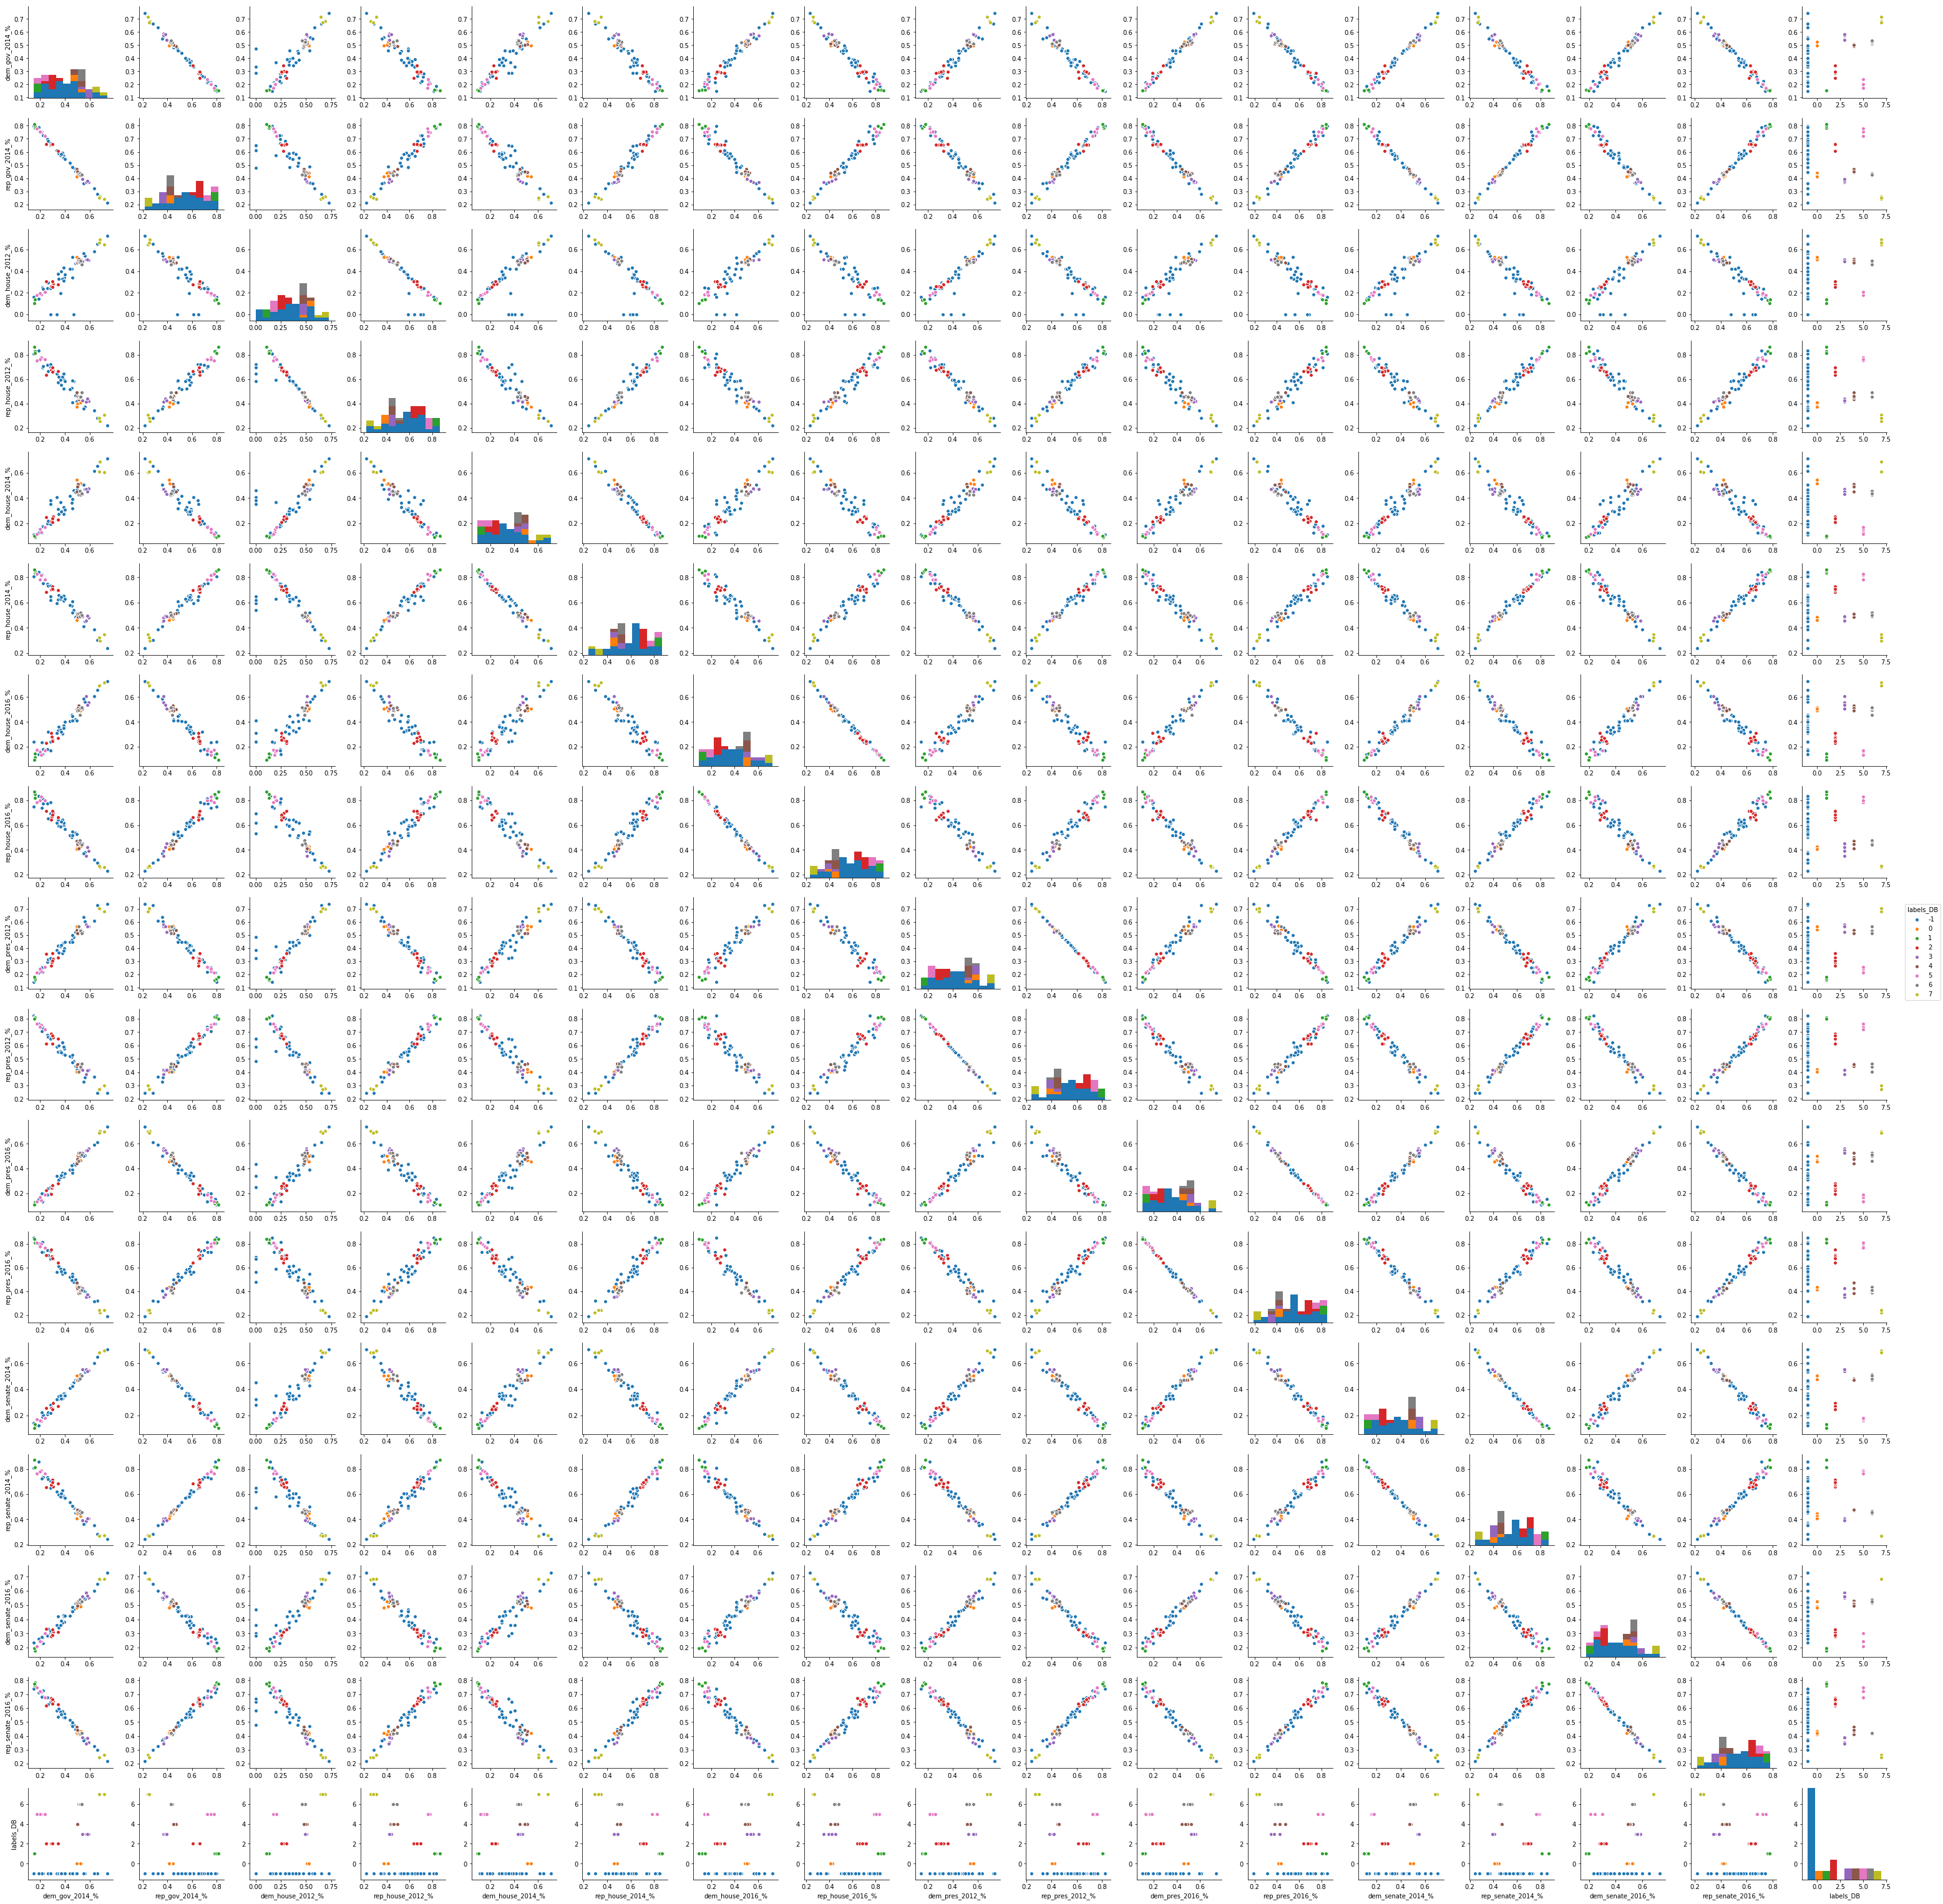

In [125]:
sns.pairplot(X_bd, hue="labels_DB")

After testing different variables within a BDSCAN model I kept getting a large amount of "-1" in my variables. This means that these data point were to noisy for the model to be able to classify. 
With my KMeans of K=3 and DBSCAN not producing the results I am looking for, my next step to to change the K in the KMeans model too see if a different number of K will produce the results I am looking for. 

# KMeans with different Ks

With this function I will easily be able to test different K's

In [126]:
def test_ks(df, number_of_k):
    X = df.drop("county", axis=1)
    y = df["county"]
    model = KMeans(n_clusters=number_of_k, random_state=33).fit(X)
    X["labels"] = model.labels_
    print(X["labels"].unique())
    return sns.pairplot(X, hue="labels")

[1 0 2]


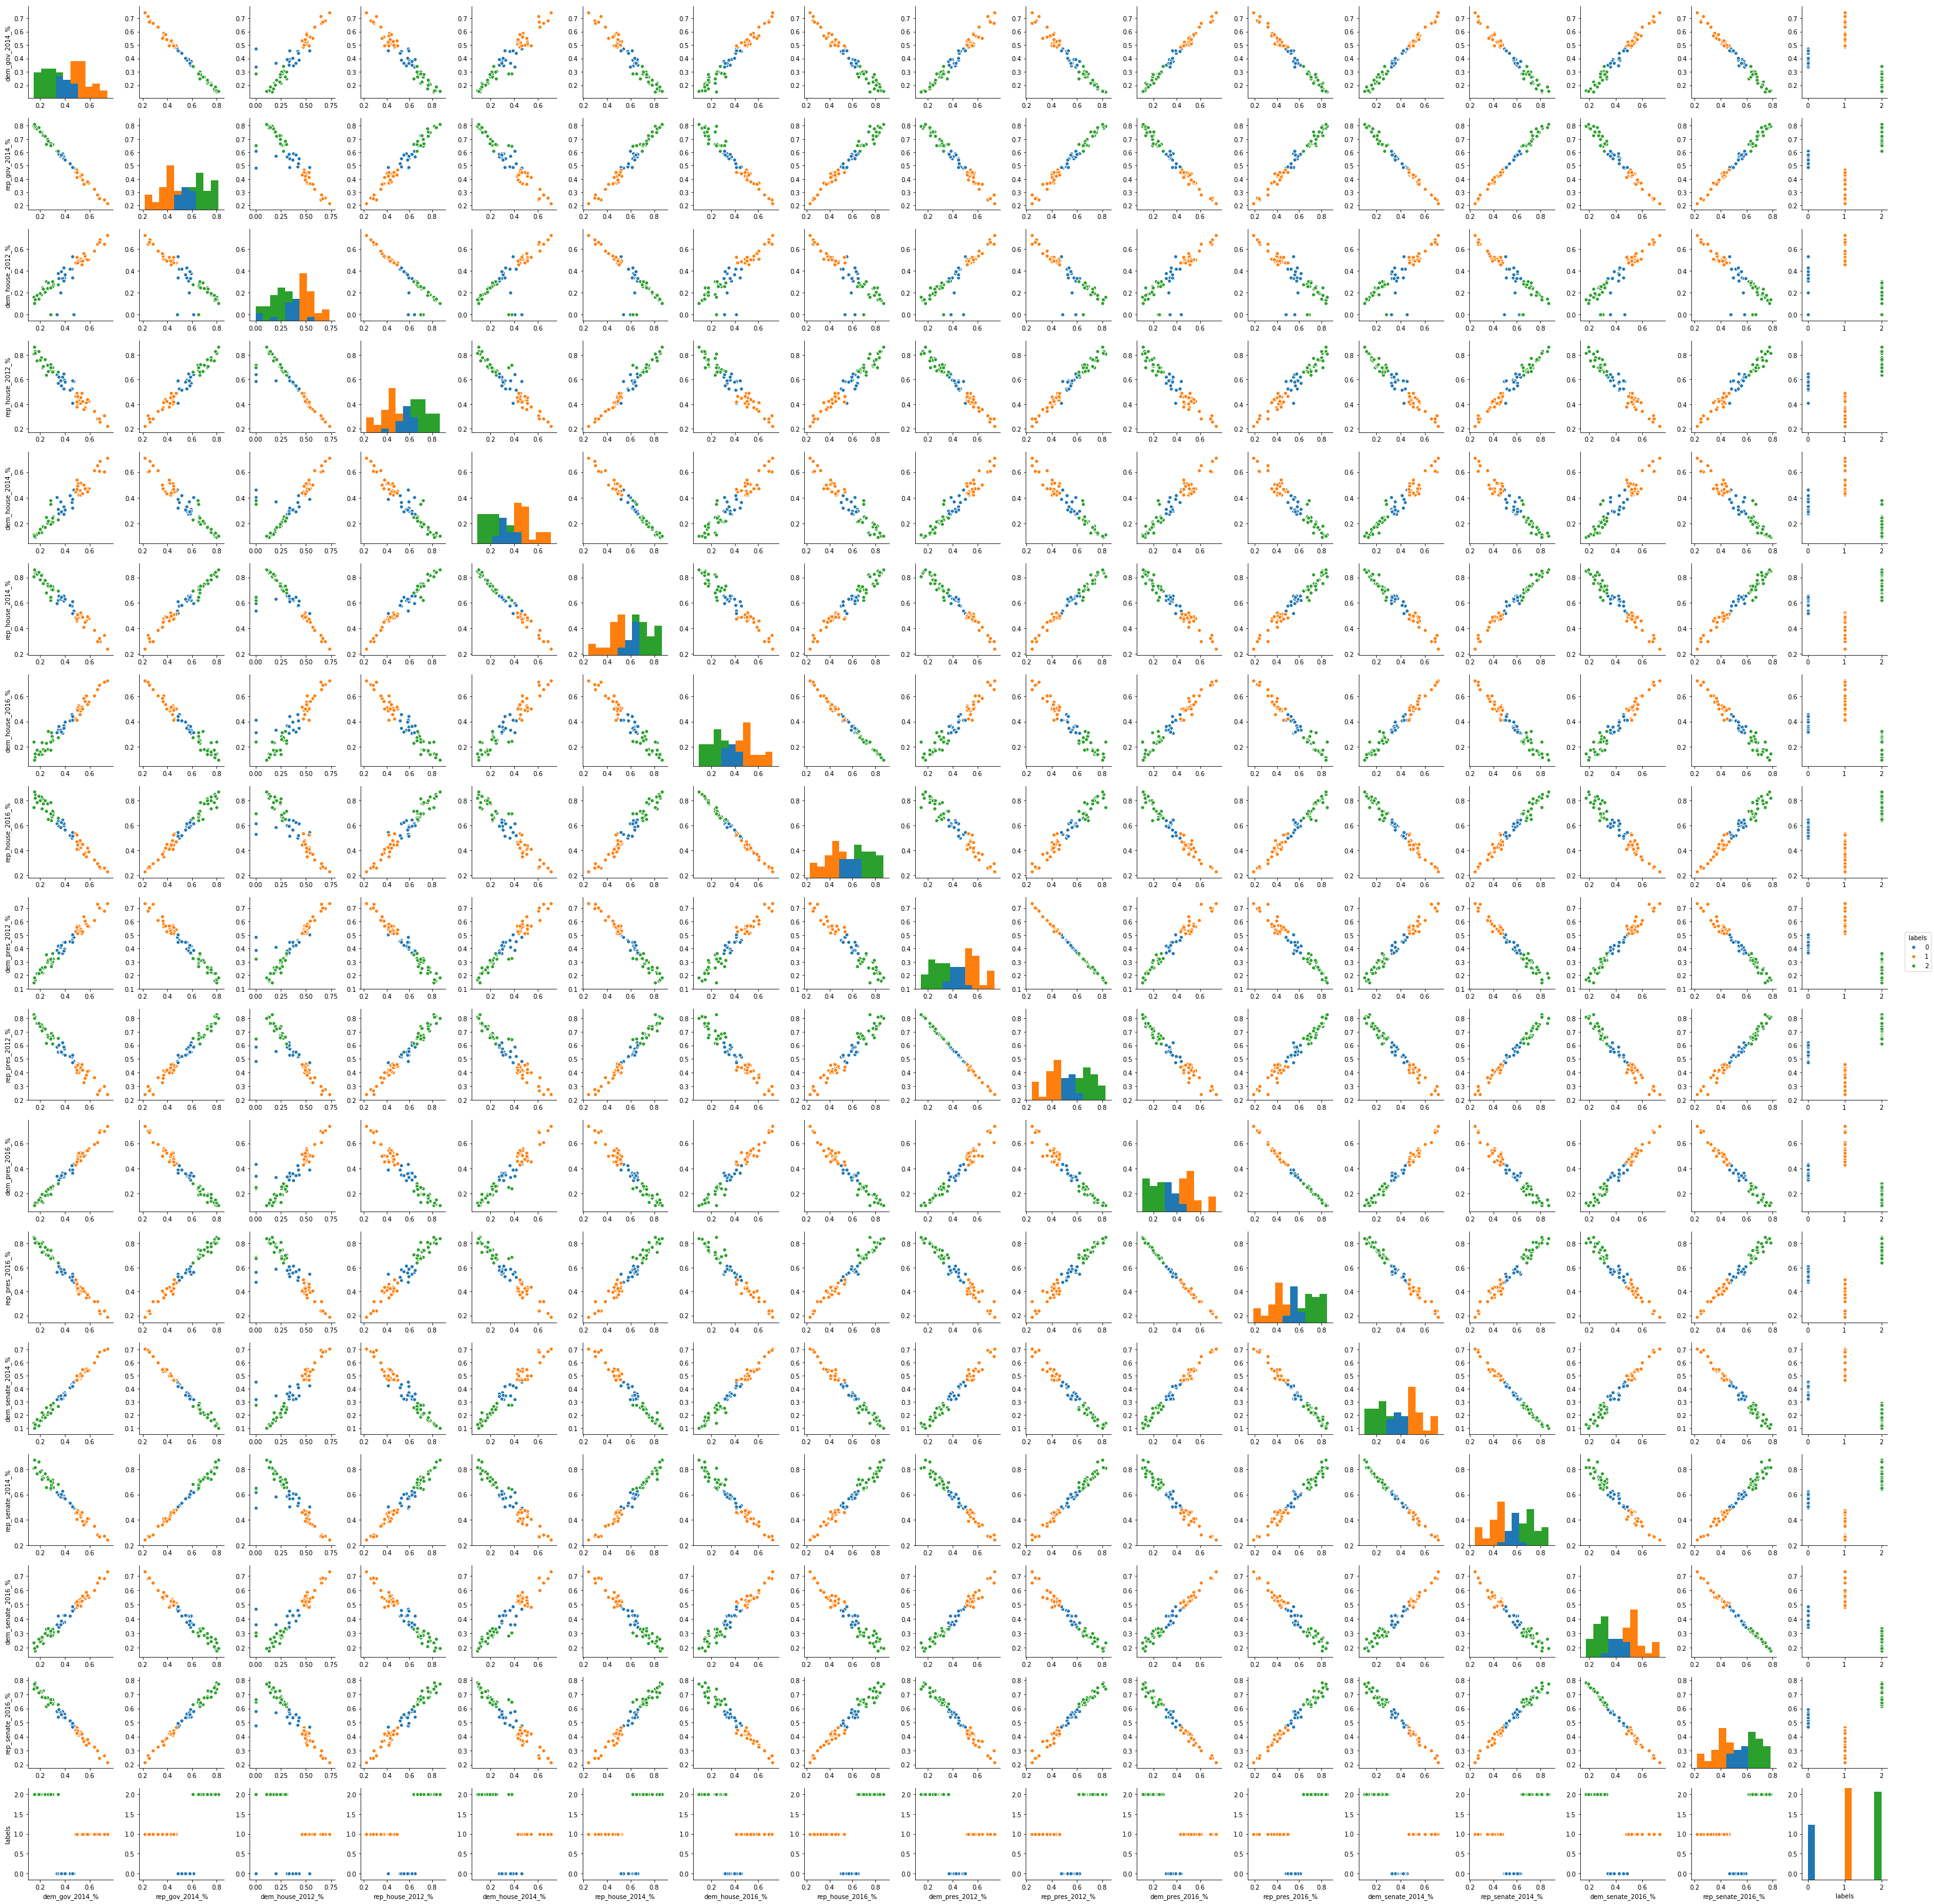

In [127]:
test_ks(county_vote_history, 3)

[1 0 2 3]


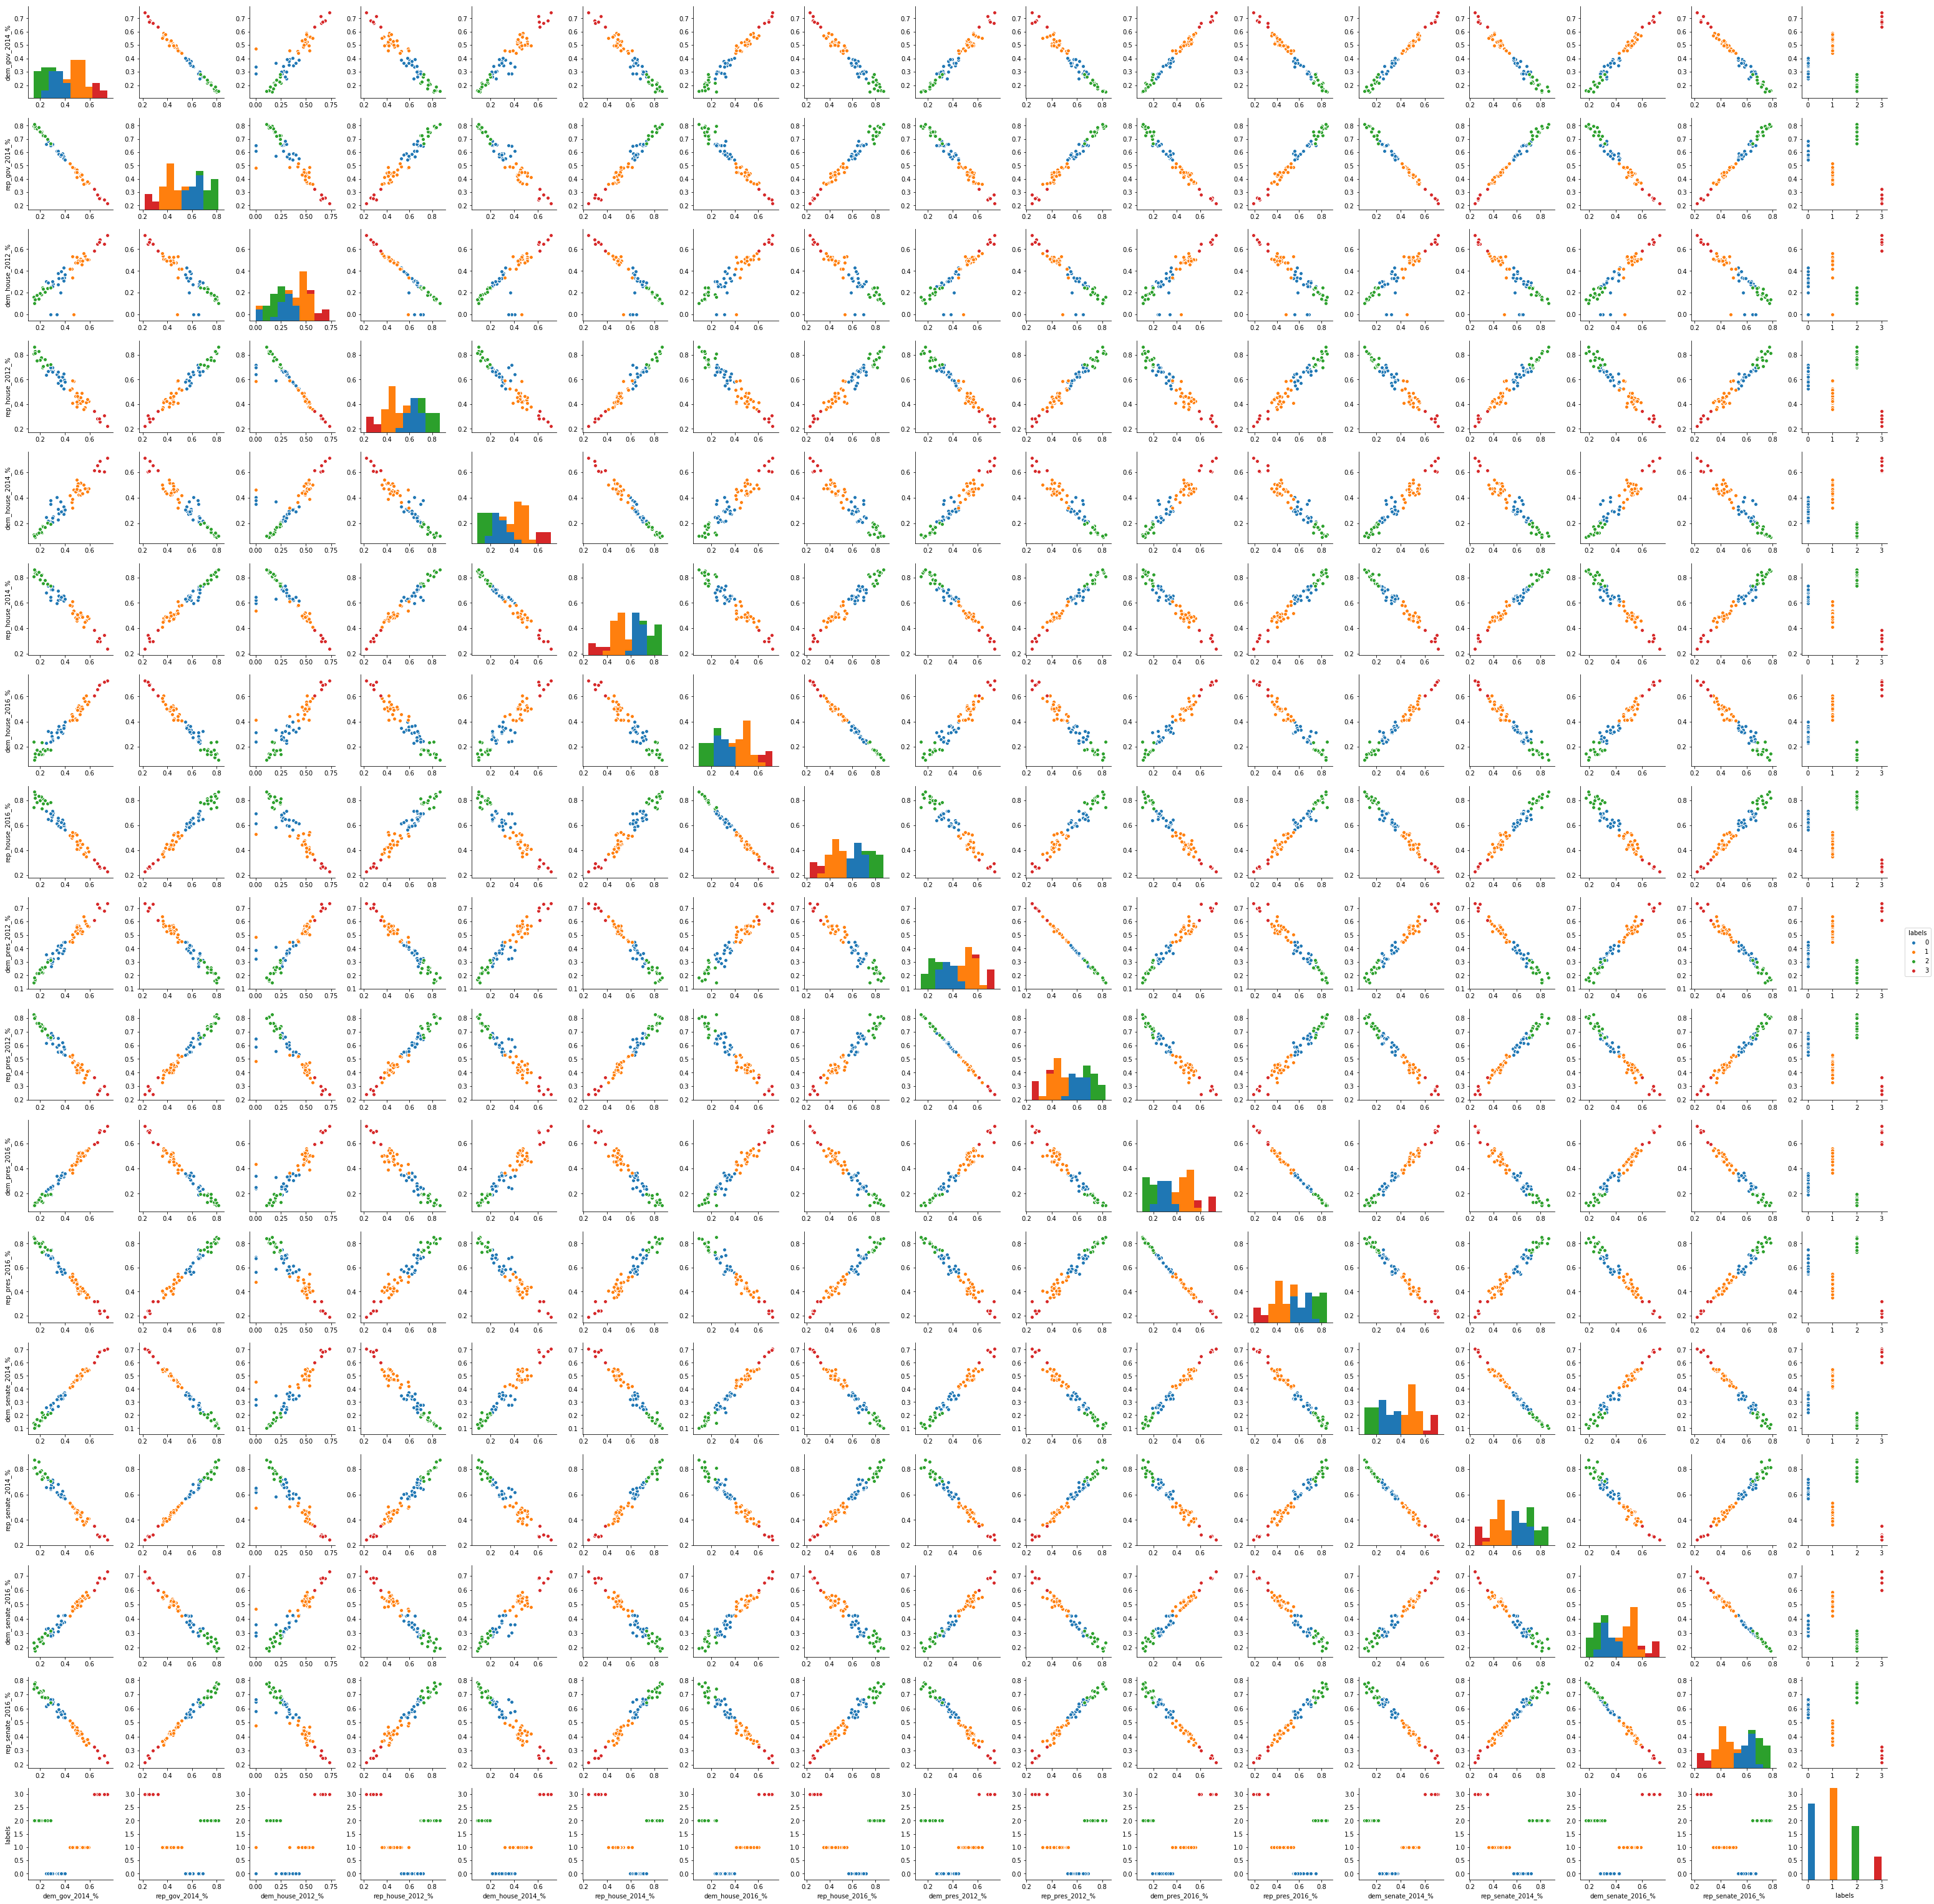

In [128]:
test_ks(county_vote_history, 4)

[1 0 2 3 4]


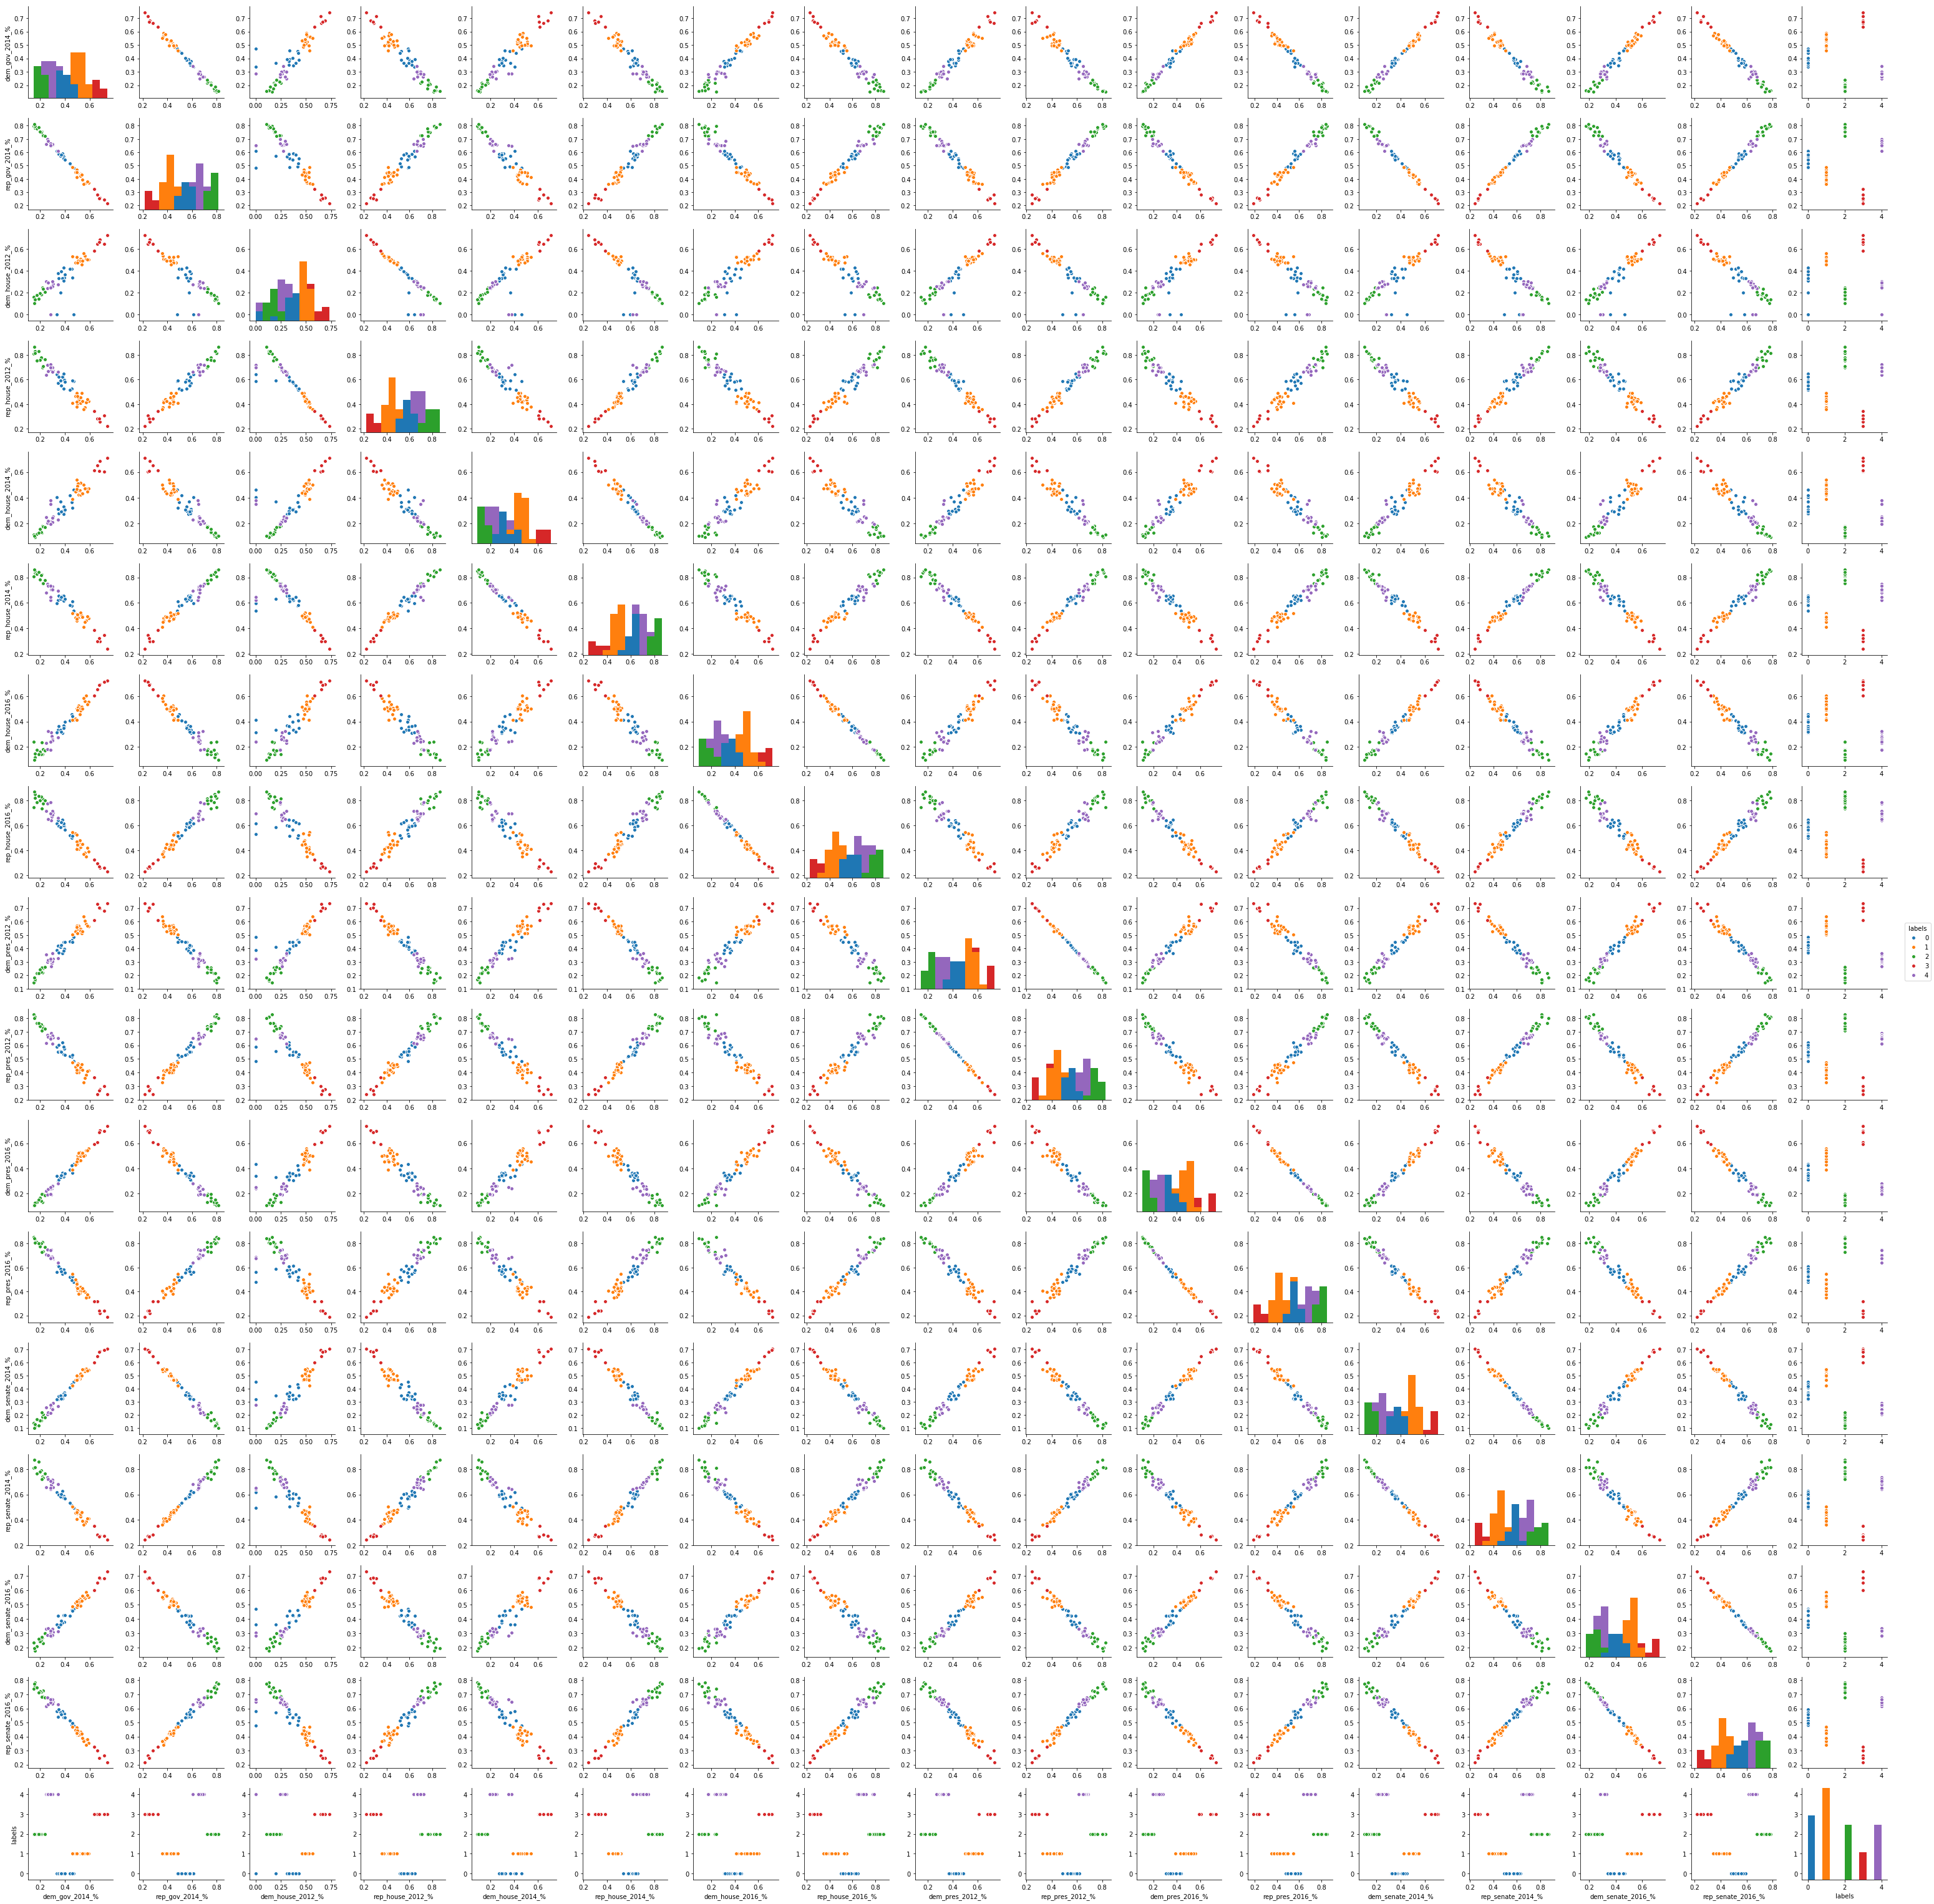

In [129]:
test_ks(county_vote_history, 5)

[1 5 2 3 0 4]


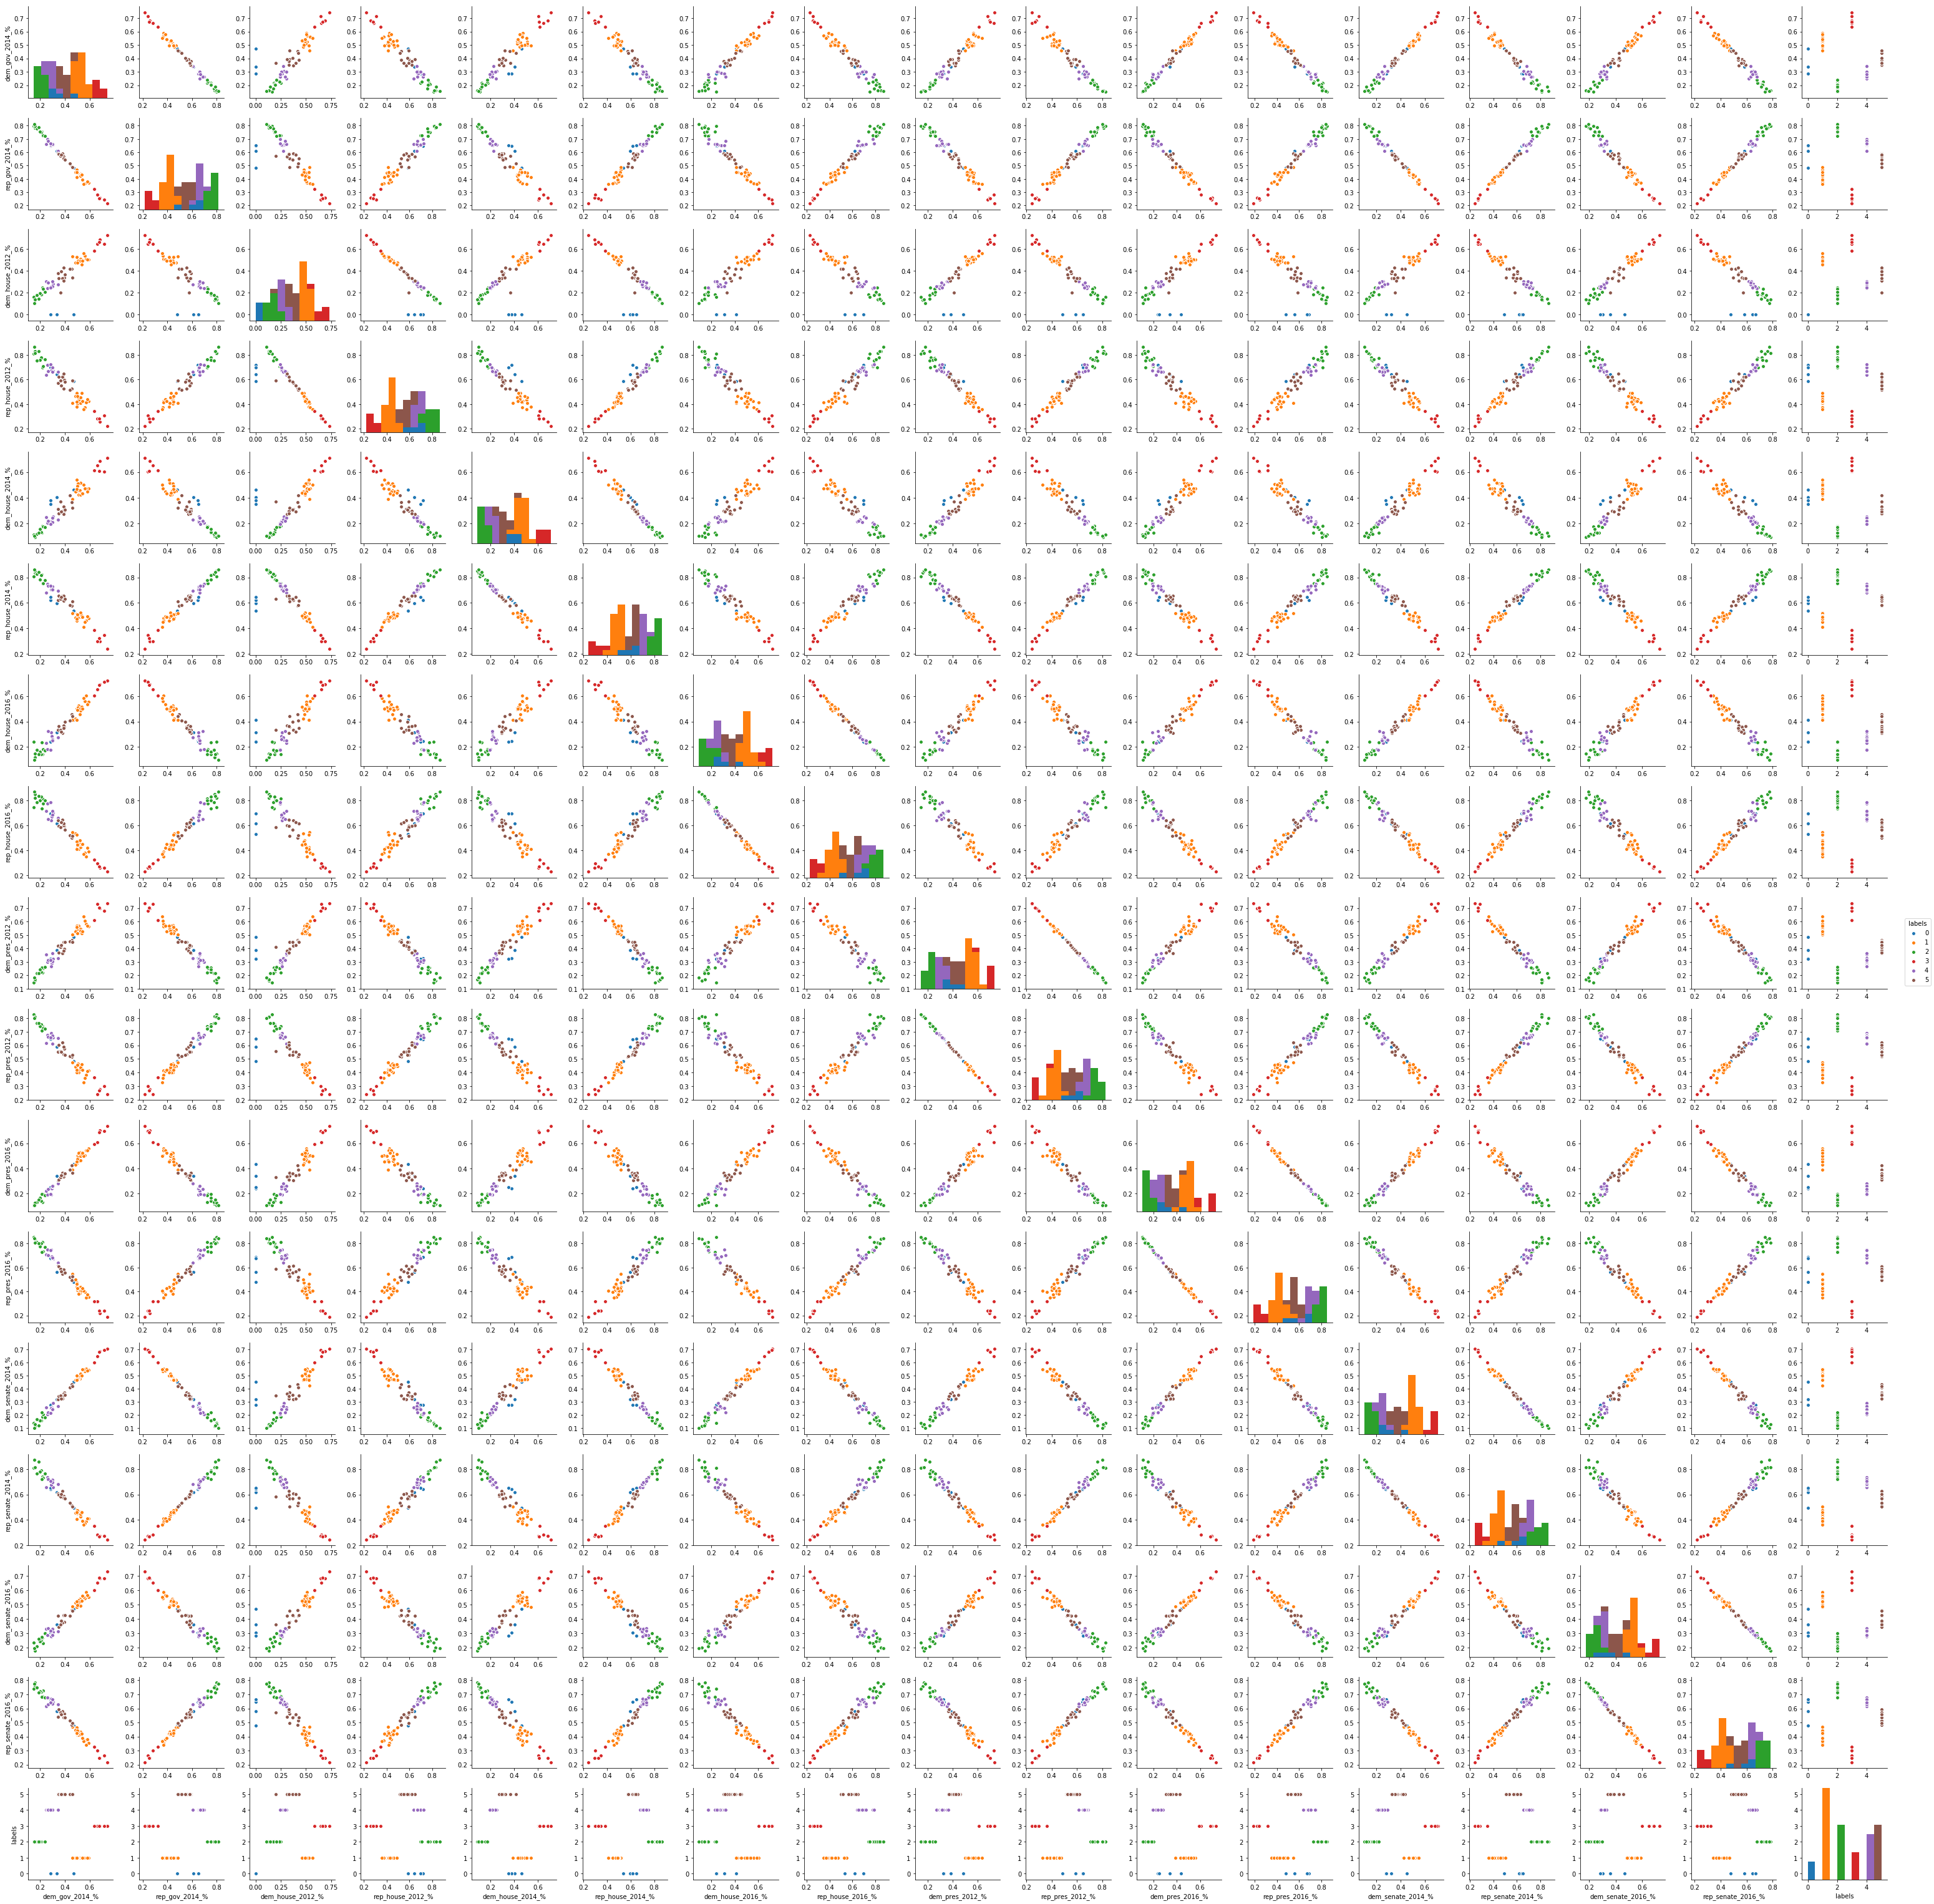

In [130]:
test_ks(county_vote_history, 6)

Looking closely at each of the pair plot. I can kind of see what how each group will look like along a few graphs and I can see the layout in the bottom left graph. Using these I can get a slight idea on how each of these models turned out. I want a closer look at results from KMneans with 4, 5 and 6 groups. I will be adding these to the data frame and exporting these so I can look at them closer in Tableau. 

In [134]:
model_4 = KMeans(n_clusters=4, random_state=33).fit(X)

In [135]:
county_history_df = pd.concat([county_history_df,pd.DataFrame(data = model_4.labels_, columns=["label_4"])], axis=1)

In [136]:
county_history_df["label_4"] = county_history_df["label_4"].map({0:"Lean REP", 1:"Solid REP", 2:"Lean DEM", 3:"Solid DEM"})

In [137]:
model_5 = KMeans(n_clusters=5, random_state=33).fit(X)

In [138]:
county_history_df = pd.concat([county_history_df,pd.DataFrame(data = model_5.labels_, columns=["label_5"])], axis=1)

In [139]:
county_history_df["label_5"] = county_history_df["label_5"].map({0:"Lean REP", 1:"Safely REP", 2:"Lean DEM", 3:"Solid DEM", 4:"Solid REP"})

In [140]:
model_6 = KMeans(n_clusters=6, random_state=33).fit(X)

In [141]:
county_history_df = pd.concat([county_history_df,pd.DataFrame(data = model_6.labels_, columns=["label_6"])], axis=1)

In [142]:
county_history_df["label_6"] = county_history_df["label_6"].map({0:"Solid REP", 1:"Swing", 2:"Lean DEM", 3:"Safely REP", 4:"Lean REP", 5:"Solid DEM"})

In [143]:
county_history_df.head()

county  dem_gov_2014_%  rep_gov_2014_%  dem_house_2012_%  \
0      Adams        0.501126        0.444168          0.526886   
1    Alamosa        0.509386        0.433133          0.486207   
2   Arapahoe        0.520078        0.439368          0.485311   
3  Archuleta        0.394250        0.555210          0.339208   
4       Baca        0.217578        0.725616          0.247859   

   rep_house_2012_%  dem_house_2014_%  rep_house_2014_%  dem_house_2016_%  \
0          0.401861          0.511630          0.470264          0.514574   
1          0.458622          0.425093          0.515413          0.495194   
2          0.450000          0.455291          0.490463          0.457761   
3          0.595602          0.297932          0.634433          0.356941   
4          0.698237          0.178631          0.754591          0.142857   

   rep_house_2016_%  dem_pres_2012_%    ...      dem_pres_2016_%  \
0          0.426280         0.571123    ...             0.498552   
1          0.462774         0.567535    ...             0.459576   
2          0.478489         0.539042    ...             0.527590   
3          0.597823         0.397832    ...             0.340646   
4          0.815436         0.221747    ...             0.131444   

   rep_pres_2016_%  dem_senate_2014_%  rep_senate_2014_%  dem_senate_2016_%  \
0         0.413482           0.476951           0.448761           0.526509   
1         0.438968           0.474155           0.456665           0.529977   
2         0.386252           0.480201           0.464848           0.540040   
3         0.581006           0.372272           0.569045           0.379206   
4         0.814213           0.189887           0.739107           0.269878   

   rep_senate_2016_%  label_3    label_4    label_5    label_6  
0           0.412360      DEM   Lean DEM   Lean DEM   Lean DEM  
1           0.415089      DEM   Lean DEM   Lean DEM   Lean DEM  
2           0.409837      DEM   Lean DEM   Lean DEM   Lean DEM  
3           0.561500    Swing   Lean REP   Lean REP   Lean REP  
4           0.687091      REP  Solid REP  Solid REP  Solid REP  

[5 rows x 21 columns]

In [147]:
county_history_df[["county", "label_3","label_4","label_5","label_6"]]

county label_3    label_4     label_5     label_6
0         Adams     DEM   Lean DEM    Lean DEM    Lean DEM
1       Alamosa     DEM   Lean DEM    Lean DEM    Lean DEM
2      Arapahoe     DEM   Lean DEM    Lean DEM    Lean DEM
3     Archuleta   Swing   Lean REP    Lean REP    Lean REP
4          Baca     REP  Solid REP   Solid REP   Solid REP
5          Bent   Swing   Lean REP    Lean REP    Lean REP
6       Boulder     DEM  Solid DEM   Solid DEM   Solid DEM
7    Broomfield     DEM   Lean DEM    Lean DEM    Lean DEM
8       Chaffee   Swing   Lean REP    Lean REP       Swing
9      Cheyenne     REP  Solid REP   Solid REP   Solid REP
10  Clear Creek     DEM   Lean DEM    Lean DEM    Lean DEM
11      Conejos     DEM   Lean DEM    Lean DEM    Lean DEM
12     Costilla     DEM  Solid DEM   Solid DEM   Solid DEM
13      Crowley     REP  Solid REP  Safely REP  Safely REP
14       Custer     REP  Solid REP  Safely REP  Safely REP
15        Delta     REP  Solid REP  Safely REP  Safely REP
16       Denver     DEM  Solid DEM   Solid DEM   Solid DEM
17      Dolores     REP  Solid REP  Safely REP  Safely REP
18      Douglas   Swing   Lean REP    Lean REP    Lean REP
19        Eagle     DEM   Lean DEM    Lean DEM    Lean DEM
20      El Paso   Swing   Lean REP    Lean REP    Lean REP
21       Elbert     REP  Solid REP   Solid REP   Solid REP
22      Fremont     REP  Solid REP  Safely REP  Safely REP
23     Garfield   Swing   Lean REP    Lean REP       Swing
24       Gilpin     DEM   Lean DEM    Lean DEM    Lean DEM
25        Grand   Swing   Lean REP    Lean REP       Swing
26     Gunnison     DEM   Lean DEM    Lean DEM    Lean DEM
27     Hinsdale   Swing   Lean REP    Lean REP    Lean REP
28     Huerfano     DEM   Lean DEM    Lean DEM    Lean DEM
29      Jackson     REP  Solid REP   Solid REP   Solid REP
30    Jefferson     DEM   Lean DEM    Lean DEM    Lean DEM
31        Kiowa     REP  Solid REP   Solid REP   Solid REP
32   Kit Carson     REP  Solid REP   Solid REP   Solid REP
33     La Plata     DEM   Lean DEM    Lean DEM    Lean DEM
34         Lake     DEM   Lean DEM    Lean DEM    Lean DEM
35      Larimer     DEM   Lean DEM    Lean DEM    Lean DEM
36   Las Animas   Swing   Lean REP    Lean REP       Swing
37      Lincoln     REP  Solid REP   Solid REP   Solid REP
38        Logan     REP  Solid REP  Safely REP  Safely REP
39         Mesa     REP  Solid REP  Safely REP  Safely REP
40      Mineral   Swing   Lean REP    Lean REP       Swing
41       Moffat     REP  Solid REP   Solid REP   Solid REP
42    Montezuma   Swing   Lean REP    Lean REP    Lean REP
43     Montrose     REP  Solid REP  Safely REP  Safely REP
44       Morgan     REP  Solid REP  Safely REP  Safely REP
45        Otero   Swing   Lean REP    Lean REP    Lean REP
46        Ouray     DEM   Lean DEM    Lean DEM    Lean DEM
47         Park   Swing   Lean REP    Lean REP    Lean REP
48     Phillips     REP  Solid REP   Solid REP   Solid REP
49       Pitkin     DEM  Solid DEM   Solid DEM   Solid DEM
50      Prowers     REP  Solid REP  Safely REP  Safely REP
51       Pueblo     DEM   Lean DEM    Lean DEM    Lean DEM
52   Rio Blanco     REP  Solid REP   Solid REP   Solid REP
53   Rio Grande   Swing   Lean REP    Lean REP    Lean REP
54        Routt     DEM   Lean DEM    Lean DEM    Lean DEM
55     Saguache     DEM   Lean DEM    Lean DEM    Lean DEM
56     San Juan     DEM   Lean DEM    Lean DEM    Lean DEM
57   San Miguel     DEM  Solid DEM   Solid DEM   Solid DEM
58     Sedgwick     REP  Solid REP  Safely REP  Safely REP
59       Summit     DEM  Solid DEM   Solid DEM   Solid DEM
60       Teller     REP  Solid REP  Safely REP  Safely REP
61   Washington     REP  Solid REP   Solid REP   Solid REP
62         Weld   Swing   Lean REP    Lean REP    Lean REP
63         Yuma     REP  Solid REP   Solid REP   Solid REP

In [145]:
#county_history_df.to_csv("county_vote_labeling.csv", index=False)

Below are some of the races with each of the different models visualized in Tableau.

In [ ]:
#![Pres_16](./Images/2016 Pres.png)